# Title : Analyzing Weather Data from OpenWeatherMap API

In [1]:
import requests 
import pandas as pd 
import datetime

In [2]:
api_key = 'fb365aa6104829b44455572365ff3b4e' 

In [3]:
lat = 18.184135
lon = 74.610764

In [4]:
api_url = f"http://api.openweathermap.org/data/2.5/forecast?lat={lat}&lon={lon}&appid={api_key}"

In [5]:
response = requests.get(api_url)
weather_data = response.json()
weather_data.keys()
len(weather_data['list'])
weather_data['list'][0]['weather'][0]['description']

'broken clouds'

In [6]:
temperatures = [item['main']['temp'] for item in weather_data['list']] 
timestamps = [pd.to_datetime(item['dt'], unit='s') for item in weather_data['list']]
temperature = [item['main']['temp'] for item in weather_data['list']]
humidity = [item['main']['humidity'] for item in weather_data['list']]
wind_speed = [item['wind']['speed'] for item in weather_data['list']]
weather_description = [item['weather'][0]['description'] for item in weather_data['list']]

In [7]:
weather_df = pd.DataFrame({'Timestamp': timestamps, 
                           'Temperature': temperatures, 
                           'humidity': humidity, 
                           'wind_speed':wind_speed,
                           'weather_description': weather_description})

In [8]:
weather_df.set_index('Timestamp', inplace=True)
max_temp = weather_df['Temperature'].max()
print(f"Maximum Temperature - {max_temp}")
min_temp = weather_df['Temperature'].min()
print(f"Minimum Temperature - {min_temp}")

Maximum Temperature - 301.83
Minimum Temperature - 289.98


In [9]:
weather_df.fillna(0, inplace=True) 

In [10]:
weather_df['Temperature'] = weather_df['Temperature'].apply(lambda x: x - 273.15 if isinstance(x, float)else x)

In [11]:
print(weather_df)

                     Temperature  humidity  wind_speed weather_description
Timestamp                                                                 
2025-11-06 12:00:00        26.01        54        2.73       broken clouds
2025-11-06 15:00:00        25.71        55        3.04       broken clouds
2025-11-06 18:00:00        25.38        56        2.71     overcast clouds
2025-11-06 21:00:00        24.01        60        2.02       broken clouds
2025-11-07 00:00:00        23.38        63        2.22     overcast clouds
2025-11-07 03:00:00        23.32        61        3.71     overcast clouds
2025-11-07 06:00:00        27.31        42        3.08       broken clouds
2025-11-07 09:00:00        28.68        37        1.69           clear sky
2025-11-07 12:00:00        27.33        44        3.44          few clouds
2025-11-07 15:00:00        24.06        51        3.89           clear sky
2025-11-07 18:00:00        22.68        52        3.21           clear sky
2025-11-07 21:00:00      

In [12]:
import matplotlib.pyplot as plt
daily_mean_temp = weather_df['Temperature'].resample('D').mean()
daily_mean_humidity = weather_df['humidity'].resample('D').mean()
daily_mean_wind_speed = weather_df['wind_speed'].resample('D').mean()

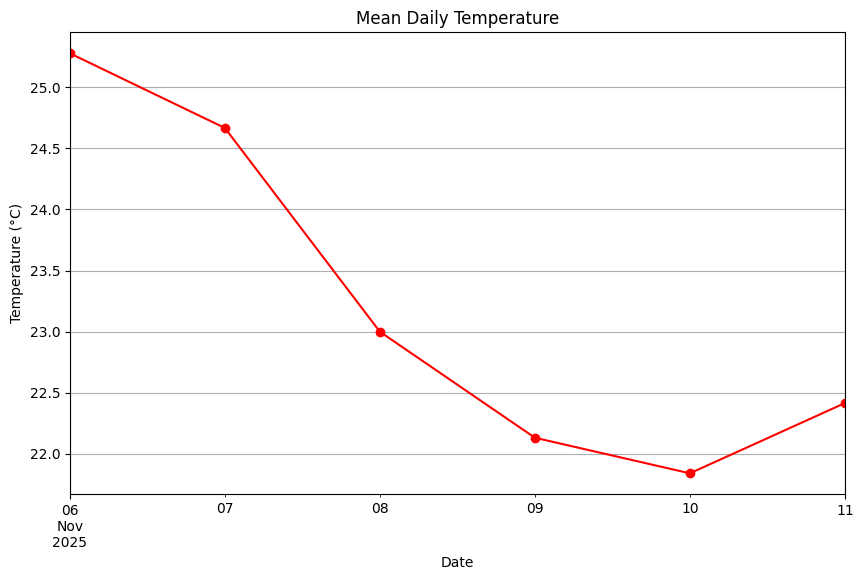

In [13]:
plt.figure(figsize=(10, 6))
daily_mean_temp.plot(color='red', linestyle='-', marker='o')
plt.title('Mean Daily Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()

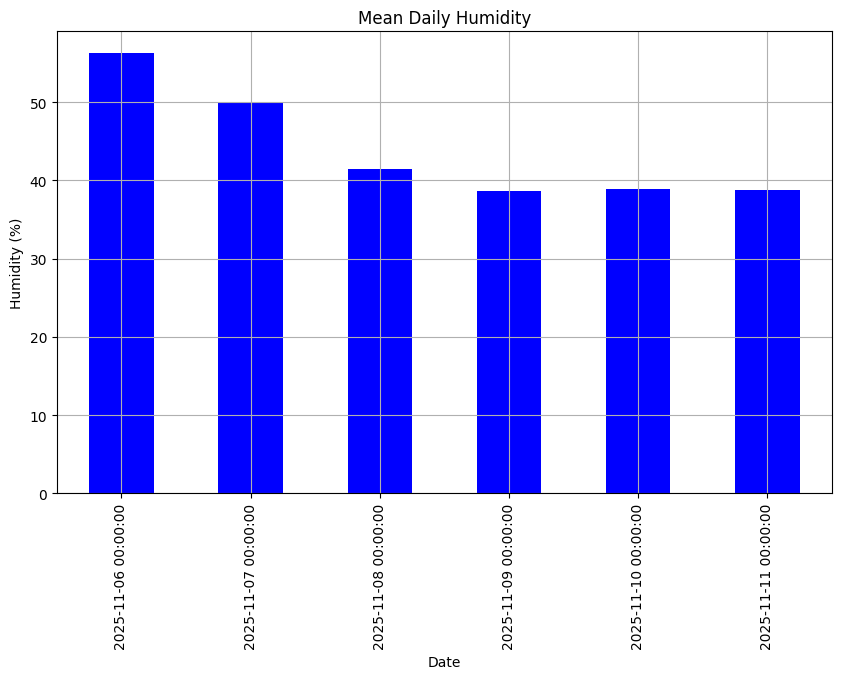

In [14]:
plt.figure(figsize=(10, 6))
daily_mean_humidity.plot(kind='bar', color='blue')
plt.title('Mean Daily Humidity')
plt.xlabel('Date')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.show()

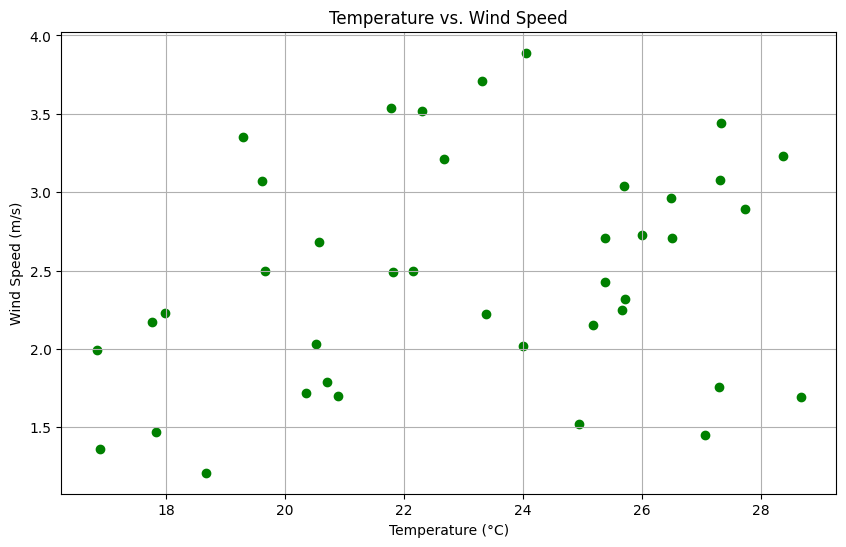

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(weather_df['Temperature'], weather_df['wind_speed'], color='green')
plt.title('Temperature vs. Wind Speed')
plt.xlabel('Temperature (°C)')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)
plt.show()

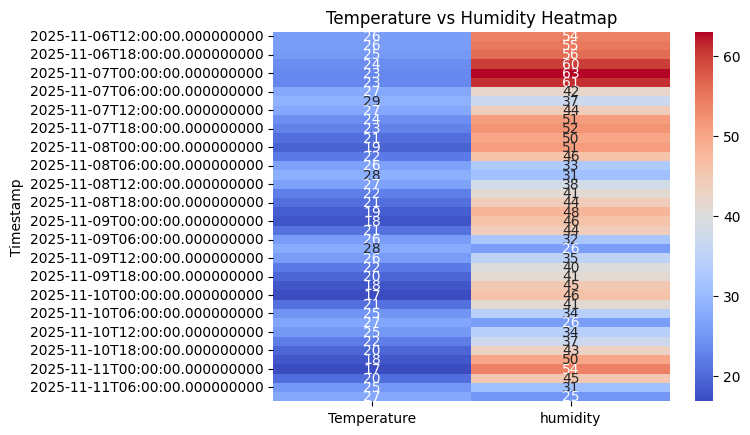

In [16]:
import seaborn as sns
heatmap_data = weather_df[['Temperature', 'humidity']]
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm')
plt.title('Temperature vs Humidity Heatmap')
plt.show()

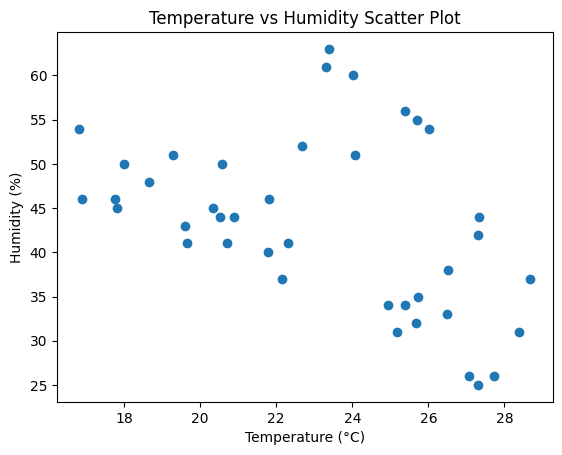

In [17]:
plt.scatter(weather_df['Temperature'], weather_df['humidity'])
plt.xlabel('Temperature (°C)')
plt.ylabel('Humidity (%)')
plt.title('Temperature vs Humidity Scatter Plot')
plt.show()